In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import time

from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver

from IPython.display import display, Image

# Web 1: Selenium

### Tricky page URL:
https://tyler.caraza-harter.com/cs320/tricky/scrape.html

- Operations:
    - `b.get(URL)`: sends HTTP GET request to the URL
    - `b.page_source`: HTML source for the page

In [2]:
options = Options()
options.headless = True # don't use a GUI (necessary on a VM)
service = Service(executable_path="chromium.chromedriver")
b = webdriver.Chrome(options=options, service=service)

### page1.html: Javascript table example

In [3]:
url = "https://tyler.caraza-harter.com/cs320/tricky/page1.html"
# TODO: send HTTP GET request to URL
b.get(url)

# TODO: display HTML source for the page
print(b.page_source)

<html><head>
    <script src="https://code.jquery.com/jquery-3.4.1.js"></script>
    <script>
      function addTable() {
        var html = "<table border=1 id='coords'>\n";
        html += "<tr><td>x</td><td>y</td></tr>\n";
        for (i = 0; i < 10; i++) {
          html += "<tr><td>" + (i*2) + "</td><td>" + (i*2+1) + "</td></tr>\n";
        }
        html += "</table>";

        var t = document.createElement("div");
        t.innerHTML = html;
        document.body.appendChild(t);
      }
      
      function main() {
        setTimeout(addTable, 1000)
      }
      </script>
  </head>
  <body onload="main()">
    <h1>Welcome</h1>
    <h3>Here's a table</h3>
    <table border="1" id="alpha">
      <tbody><tr><td>A</td><td>B</td><td>C</td></tr>
      <tr><td>1</td><td>2</td><td>3</td></tr>
      <tr><td>4</td><td>5</td><td>6</td></tr>
    </tbody></table>

    <h3>And another one...</h3>
  

</body></html>


### How can we get the 2nd table?

- Run `b.page_source` again
- Selenium obtains the updated DOM tree and converts it back into HTML for us

In [4]:
print(b.page_source)

<html><head>
    <script src="https://code.jquery.com/jquery-3.4.1.js"></script>
    <script>
      function addTable() {
        var html = "<table border=1 id='coords'>\n";
        html += "<tr><td>x</td><td>y</td></tr>\n";
        for (i = 0; i < 10; i++) {
          html += "<tr><td>" + (i*2) + "</td><td>" + (i*2+1) + "</td></tr>\n";
        }
        html += "</table>";

        var t = document.createElement("div");
        t.innerHTML = html;
        document.body.appendChild(t);
      }
      
      function main() {
        setTimeout(addTable, 1000)
      }
      </script>
  </head>
  <body onload="main()">
    <h1>Welcome</h1>
    <h3>Here's a table</h3>
    <table border="1" id="alpha">
      <tbody><tr><td>A</td><td>B</td><td>C</td></tr>
      <tr><td>1</td><td>2</td><td>3</td></tr>
      <tr><td>4</td><td>5</td><td>6</td></tr>
    </tbody></table>

    <h3>And another one...</h3>
  

</body></html>


### Finding elements

- Operations:
    - `b.get(URL)`: sends HTTP GET request to the URL
    - `b.page_source`: HTML source for the page
    - `b.find_elements("id", <ID>)`: searches for a specific element that matches the "id"
    - `b.find_elements("tag name", <TAG>)`: searches for a specific element using corresponding tag name
    - `b.find_element` versus `b.find_elements`:
        - `find_element` gives first match
        - `find_elements` gives all matches
    - `<element obj>.text`: gives text associated with that element

In [5]:
# TODO: find first table using id "alpha"
print(b.find_elements("id", "alpha"))

[<selenium.webdriver.remote.webelement.WebElement (session="6ff91577438cf8e70f9f621c4c9285ee", element="33E5697C33CDABCE655B2ECF2C10AE26_element_2")>]


In [6]:
# TODO: repeat GET request and find all tables using tag "table"
b.get(url)
tbls = b.find_elements("tag name", "table")
print(len(tbls))

1


### POLLING: How would we know when the updated page becomes available?
- keep checking regularly until you get all the details you are looking for.

In [7]:
b.get(url)

while True:
    tbls = b.find_elements("tag name", "table")
    print("Tables:", len(tbls))
        
    if len(tbls) == 2:
        print(tbls)
        break
    
    time.sleep(0.1) # sleep for 0.1 second

Tables: 1
Tables: 1
Tables: 1
Tables: 1
Tables: 1
Tables: 1
Tables: 1
Tables: 1
Tables: 1
Tables: 1
Tables: 2
[<selenium.webdriver.remote.webelement.WebElement (session="6ff91577438cf8e70f9f621c4c9285ee", element="7BFEEC251216AD0B89851032C2B6FA89_element_6")>, <selenium.webdriver.remote.webelement.WebElement (session="6ff91577438cf8e70f9f621c4c9285ee", element="7BFEEC251216AD0B89851032C2B6FA89_element_9")>]


### Let's extract the 2nd table information

In [8]:
b.find_elements("tag name", "tr") # gives us all tr elements on the webpage

[<selenium.webdriver.remote.webelement.WebElement (session="6ff91577438cf8e70f9f621c4c9285ee", element="7BFEEC251216AD0B89851032C2B6FA89_element_10")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6ff91577438cf8e70f9f621c4c9285ee", element="7BFEEC251216AD0B89851032C2B6FA89_element_11")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6ff91577438cf8e70f9f621c4c9285ee", element="7BFEEC251216AD0B89851032C2B6FA89_element_12")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6ff91577438cf8e70f9f621c4c9285ee", element="7BFEEC251216AD0B89851032C2B6FA89_element_13")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6ff91577438cf8e70f9f621c4c9285ee", element="7BFEEC251216AD0B89851032C2B6FA89_element_14")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6ff91577438cf8e70f9f621c4c9285ee", element="7BFEEC251216AD0B89851032C2B6FA89_element_15")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6ff91577438cf8e70f9f621c4c92

In [9]:
tbl = tbls[-1]

# TODO: find all tr elements
trs = tbl.find_elements("tag name", "tr")

# TODO: find all td elements
# TODO: extract text for all td elements into a list of list
rows = []

for tr in trs:
    tds = tr.find_elements("tag name", "td")
    assert len(tds) == 2
    rows.append([tds[0].text, tds[1].text])
    
rows

[['x', 'y'],
 ['0', '1'],
 ['2', '3'],
 ['4', '5'],
 ['6', '7'],
 ['8', '9'],
 ['10', '11'],
 ['12', '13'],
 ['14', '15'],
 ['16', '17'],
 ['18', '19']]

### Converting `rows` into a `DataFrame`

In [10]:
pd.DataFrame(rows[1:], columns=rows[0])

,x,y
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9
5,10,11
6,12,13
7,14,15
8,16,17
9,18,19


### How can we visually see the page on the VM?

- Operations:
    - `b.save_screenshot("some_file.png")`: saves a screenshot of the rendered page
    - import statement: `from IPython.display import display, Image`: helps us show the screenshot as an image inside the notebook

In [11]:
b.save_screenshot("page1.png")

True

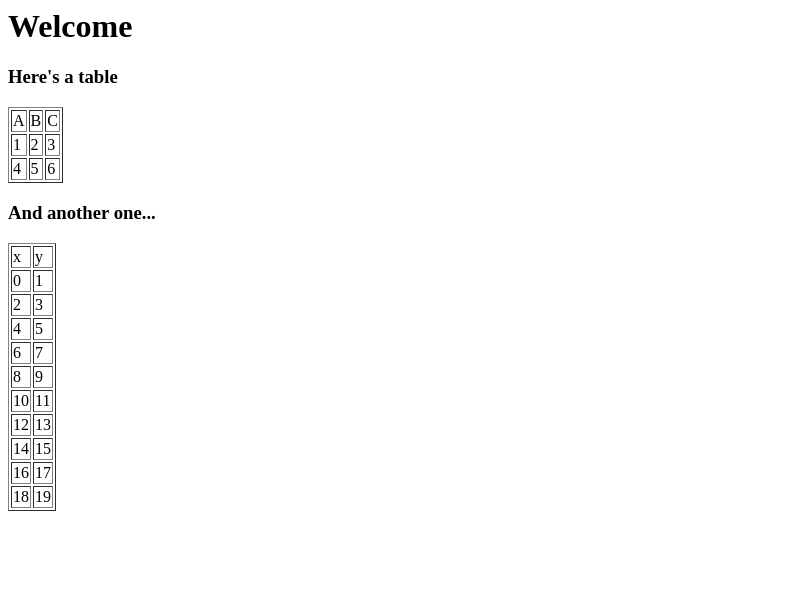

In [12]:
display(Image("page1.png"))

### Combining taking screenshot and displaying it
- useful for p3

In [13]:
def show_screen():
    b.save_screenshot("out.png")
    display(Image("out.png"))

### page2.html: "Show More!" button example

- Operations:
    `button_oject.click()`: enables us to click the button

In [14]:
url = "https://tyler.caraza-harter.com/cs320/tricky/page2.html"
b.get(url)

In [15]:
# TODO: find the id for the more button (inspect element on browser)
button = b.find_element("id", "more")

In [16]:
# TODO: click the button
button.click() 
# keep running this cell reptitively
# once all data is retrieved, we will run into NoSuchElementException

In [17]:
while True:
    try:
        button = b.find_element("id", "more")
        button.click()
        show_screen()
        print("============================================================")
    except NoSuchElementException:
        print("We have all the data!")
        break
    time.sleep(1)

We have all the data!


In [18]:
print(b.page_source)

<html><head>
    <script src="https://code.jquery.com/jquery-3.4.1.js"></script>
    <script>
      var lines = [];

      function show() {
        tbl = document.getElementById("hurricanes");
        count = Math.min(10, lines.length);
        for (i=0; i<count; i++) {
          var tr = document.createElement("tr");
          tr.innerHTML = "<td>"+lines[i].replace(/,/g, "</td><td>")+"</td>";
          tbl.appendChild(tr);
        }
        lines = lines.slice(count);
        if (lines.length == 0) {
          document.getElementById("more").remove();
        }
      }

      function main() {
        fetch('hurricanes.csv')
          .then(response => response.text())
          .then(data => {
            console.log(data);
            lines = data.split("\n");
            show();
          })
      }
      </script>
  </head>
  <body onload="main()">
    <h1>Keep clicking...</h1>

    <table id="hurricanes" border="1"><tr><td>name</td><td>formed</td><td>dissipated</td><td>mph</td><

### page 3: password protection example

- Operations:
    `text_object.send_keys()`: enables us to send data to textbox

In [19]:
url = "https://tyler.caraza-harter.com/cs320/tricky/page3.html"
b.get(url)

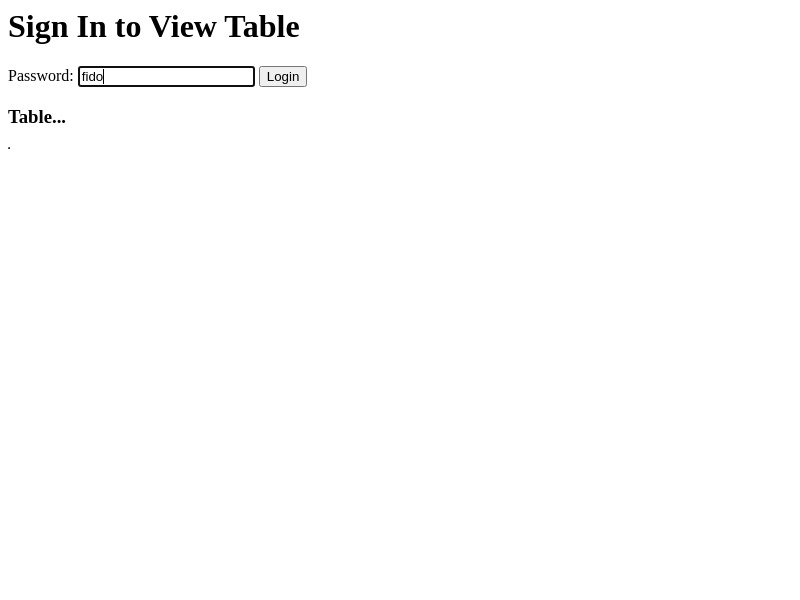

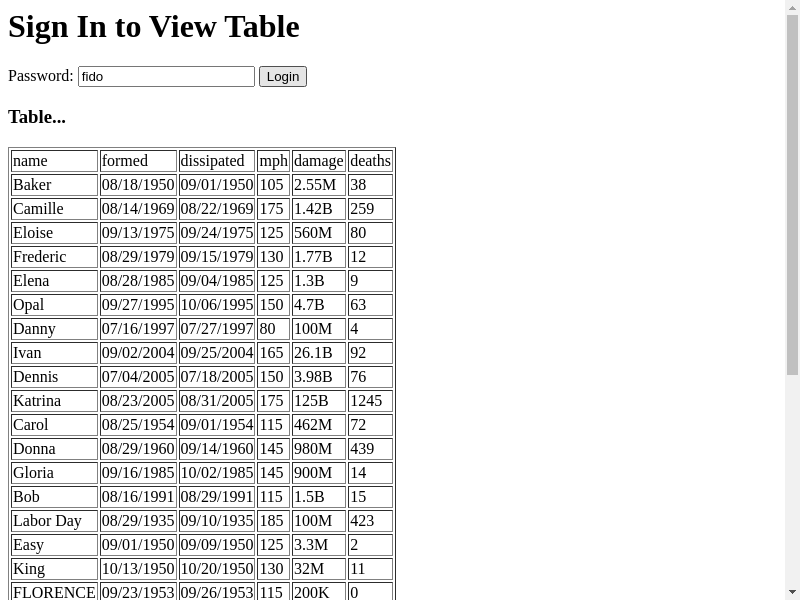

In [20]:
# TODO: find the id for password box (inspect element on browser)
# TODO: find the id for the login button (inspect element on browser)
text = b.find_element("id", "password")
button = b.find_element("id", "login_btn")

# TODO: send the password (plain text just for example purposes)
text.send_keys("fido")
show_screen()

# TODO: click the button
button.click()
show_screen()

In [21]:
print(b.page_source)

<html><head>
    <script src="https://code.jquery.com/jquery-3.4.1.js"></script>
    <script>
      var lines = [];

      function login() {
        if (document.getElementById("password").value != "fido") {
          alert("sorry, password != 'fido'")
          return;
        }

        fetch('hurricanes.csv')
          .then(response => response.text())
          .then(data => {
            console.log(data);
            lines = data.split("\n");
            show();
          })
        }

      function show() {
        tbl = document.getElementById("hurricanes");
        tbl.innerHTML = "";
        for (i=0; i<lines.length; i++) {
          var tr = document.createElement("tr");
          tr.innerHTML = "<td>"+lines[i].replace(/,/g, "</td><td>")+"</td>";
          tbl.appendChild(tr);
        }
      }
      </script>
  </head>
  <body>
    <h1>Sign In to View Table</h1>

    Password: <input id="password">
    <button id="login_btn" onclick="login()">Login</button>

    <h3>Tabl

### page 4: search data for a year

- Operations:
    `text_object.clear()`: enables us to clear the previous text

In [22]:
url = "https://tyler.caraza-harter.com/cs320/tricky/page4.html"
b.get(url)

In [23]:
# TODO: find the id for year box (inspect element on browser)
# TODO: find the id for the search button (inspect element on browser)
text = b.find_element("id", "year")
button = b.find_element("id", "search_btn")

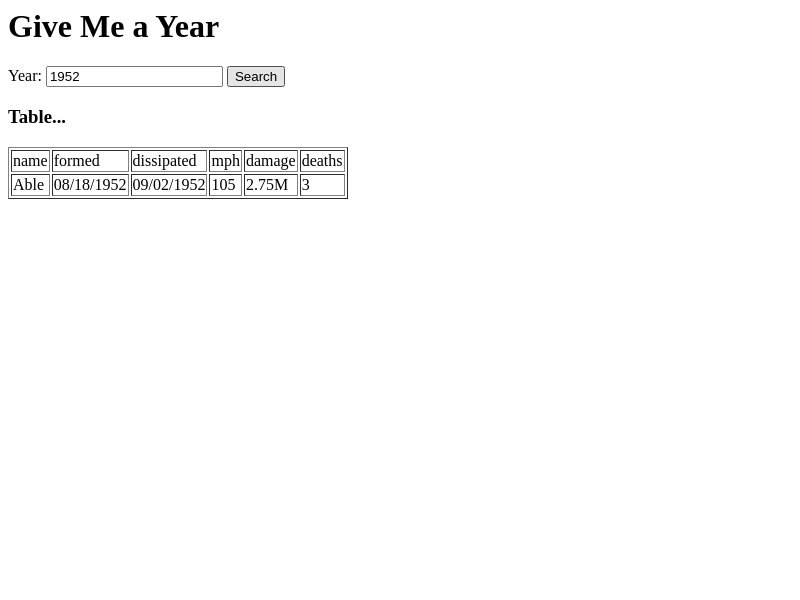

In [24]:
text.clear()
text.send_keys("1952")
button.click()
show_screen()

#### How many hurricanes were there each year?

Text(0, 0.5, 'Hurricane count')

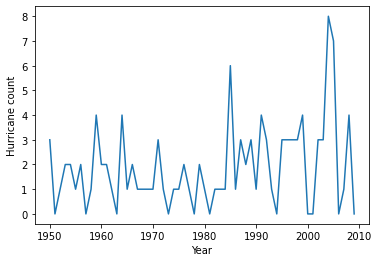

In [25]:
hurricane_counts = pd.Series(dtype=float)

for year in range(1950, 2010):
    text.clear()
    text.send_keys(str(year))
    button.click()
    # show_screen()
    
    # TODO: find all tr elements and count hurricanes for each year
    trs = b.find_elements("tag name", "tr")
    
    # TODO: We have to subtract 1 for removing header tr element
    count = len(trs) - 1
    
    hurricane_counts.loc[year] = count
    
ax = hurricane_counts.plot.line()
ax.set_xlabel("Year")
ax.set_ylabel("Hurricane count")